### Import the Packages

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt 
#import seaborn as sns
#sns.set()

### Importing and examining the data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [4]:
df_comp = raw_csv_data.copy()

This dataset displays the snapshot date and 4 closing prices of market indexes: 
* S&P 500 -> spx (USA)
* DAX 30 -> dax (German)
* FTSE 100 - ftse (UK)
* NIKKEI 225 - nikkei (Japan)

In [5]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [6]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


When examining the summary statistics above, we can immediately observe:
1. the mean value for **spx** is much lower as compared to the other 3 market indexes.
2. the max value for **spx** is greater than the min value for **ftse** and **nikkei**.
3. In general, the average values for **dax** and **ftse** are similar, whereas **spx** and **nikei** are several times smaller and larger respectively.

In [7]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

There appears to be no missing values for each column of the dataset.

### Plotting the Data

In [8]:
import matplotlib.pyplot as plt 

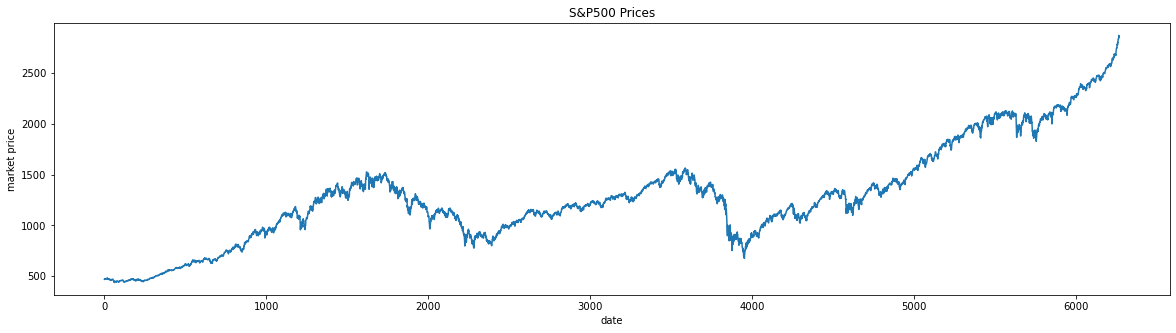

In [9]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
plt.xlabel('date')
plt.ylabel('market price')
plt.show()

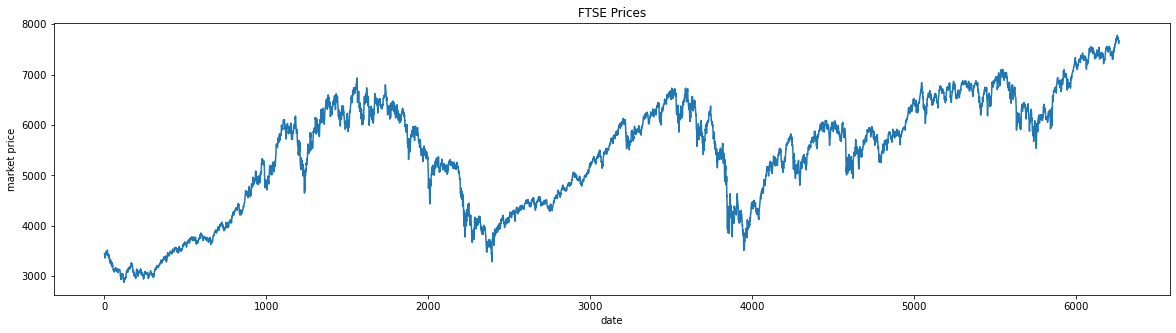

In [10]:
df_comp.ftse.plot(figsize=(20,5), title = "FTSE Prices")
plt.xlabel('date')
plt.ylabel('market price')
plt.show()

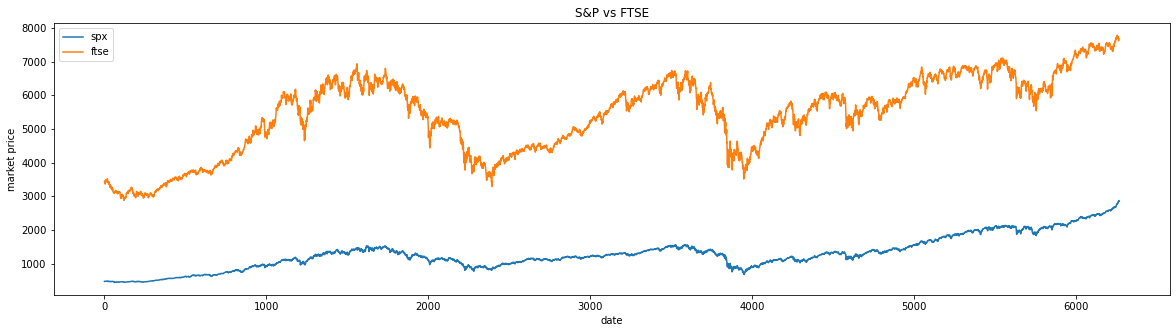

In [11]:
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5))
plt.xlabel('date')
plt.ylabel('market price')
plt.title("S&P vs FTSE")
plt.legend()
plt.show()


### The Quantile-Quantile Plot (QQ Plot)

Lets determine whether the data set is distributed a certain way.
For example, does the data fit a Normal Distribution?

In [12]:
import scipy.stats as ss
import pylab

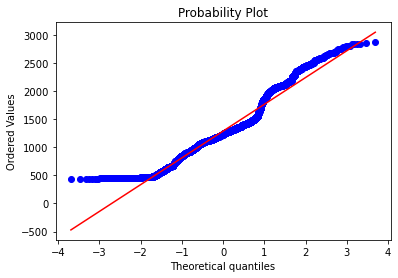

In [13]:
ss.probplot(df_comp.spx, plot=pylab)
pylab.show()

The data points display how many standard deviations they are away from the mean.
The data points, if were normally distributed, would have aligned well on the diagonal line.

### Need to convert from text to a date type

In [14]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [15]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [16]:
df_comp.date.describe(datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [17]:
# set date as index and remove integer index by setting inplace to True. 
df_comp.set_index("date", inplace = True)

In [18]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [19]:
# setting desired frequency
# 'h' hourly, 'w' weekly, 'd' daily, 'm' monthly, 'a' annually
df_comp = df_comp.asfreq('b')

In [20]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [21]:
# fill missing values
df_comp.spx = df_comp.spx.fillna(method = 'ffill')

In [22]:
df_comp.ftse = df_comp.ftse.fillna(method = 'bfill')

In [23]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

### Lets update the Data

In [45]:
# importing the necessary package
import yfinance

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
print("Current record count is: ", df_comp.shape[0])

Current record count is:  6277


In [49]:
# print first and last date of datetime index
print(df_comp.head(1).index[0])
print(df_comp.tail(1).index[0])

1994-01-07 00:00:00
2018-01-29 00:00:00


In [64]:
# Using the .download() method to get our data

raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", #The time series we are interested in - (in our case, these are the S&P, FTSE, NIKKEI and DAX)
                              start = "1994-01-07", #The starting date of our data set
                              end = "2022-07-07", #The ending date of our data set (at the time of upload, this is the current date)
                              interval = "1d", #The distance in time between two recorded observations. Since we're using daily closing prices, we set it equal to "1d", which indicates 1 day. 
                              group_by = 'ticker', #The way we want to group the scraped data. Usually we want it to be "ticker", so that we have all the information about a time series in 1 variable.
                              auto_adjust = True, #Automatically adjuss the closing prices for each period. 
                              treads = True) #Whether to use threads for mass downloading. 

[*********************100%***********************]  4 of 4 completed


In [75]:
# Creating a back up copy in case we remove/alter elements of the data by mistake
df_comp = raw_data.copy()

In [76]:
# Adding new columns to the data set
df_comp['spx'] = df_comp['^GSPC'].Close
df_comp['dax'] = df_comp['^GDAXI'].Close
df_comp['ftse'] = df_comp['^FTSE'].Close
df_comp['nikkei'] = df_comp['^N225'].Close

In [77]:
df_comp = df_comp.iloc[1:] # Removing the first elements, since we always start 1 period before the first, 
# due to time zone differences of closing prices
del df_comp['^N225']  # Removing the original tickers of the data set
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b') # Setting the frequency of the data
df_comp=df_comp.fillna(method='ffill') # Filling any missing values using forward fill

In [78]:
print (df_comp.head()) # Displaying the first 5 elements to make sure the data was scrapped correctly
print (df_comp.tail()) # Making sure of the last day we're including in the series

                   spx          dax         ftse        nikkei
                                                              
Date                                                          
1994-01-10  475.269989  2225.000000  3440.600098  18443.439453
1994-01-11  474.130005  2228.100098  3413.800049  18485.250000
1994-01-12  474.170013  2182.060059  3372.000000  18793.880859
1994-01-13  472.470001  2142.370117  3360.000000  18577.259766
1994-01-14  474.910004  2151.050049  3400.600098  18973.699219
                    spx           dax         ftse        nikkei
                                                                
Date                                                            
2022-07-01  3825.330078  12813.030273  7168.700195  25935.619141
2022-07-04  3825.330078  12773.379883  7232.700195  26153.810547
2022-07-05  3831.389893  12401.200195  7025.500000  26423.470703
2022-07-06  3845.080078  12594.519531  7107.799805  26107.650391
2022-07-07  3845.080078  12594.519531  71

In [79]:
print("Updated record count is: ", df_comp.shape[0])

Updated record count is:  7434


In [71]:
# save copy of new csv file
# df_comp.to_csv('index2022.csv', index=True)

In [80]:
df_comp.head(1)

,spx,dax,ftse,nikkei
,,,,
Date,,,,
1994-01-10,475.269989,2225.0,3440.600098,18443.439453


### Lets focus on just S&P dataset

In [81]:
df_comp['market_value']=df_comp.spx
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

# split data for train and test set
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [84]:
# white noise
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [85]:
df['wn'] = wn

In [86]:
df.describe()

,market_value,wn
,,
count,5947.000000,5947.000000
mean,1225.456322,1219.358923
std,416.154080,421.672432
min,438.920013,-527.769260
25%,970.744995,935.648887
50%,1208.410034,1219.322772
75%,1416.180054,1502.402915
max,2190.149902,2792.113146


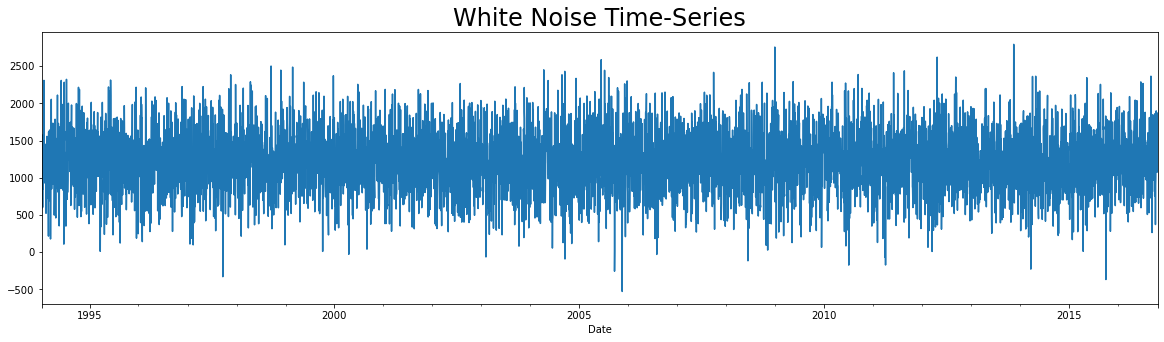

In [88]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

# no clear pattern for white noise
# 1. constant mean, 2. variance and 3. no autocorrelation

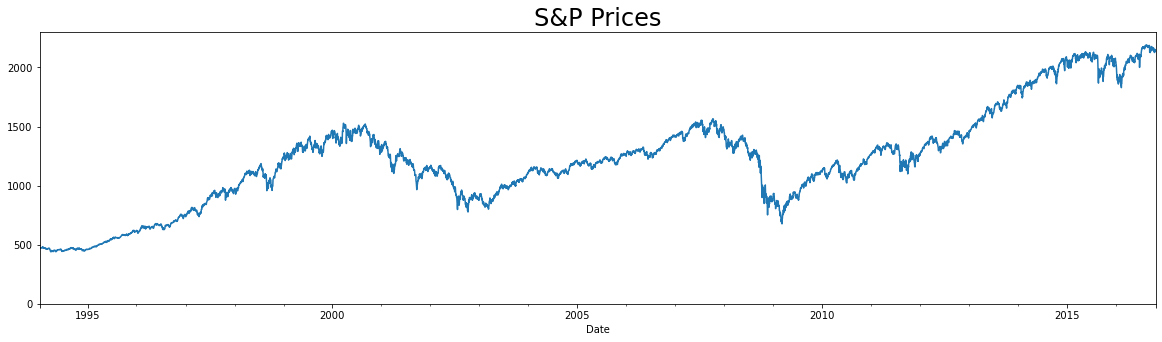

In [90]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

# by comparison with S&P, there appears to be some random walk
# characteristics of random walks include:
#    1. small variations between consecutive time periods (white noise residuals)
#    2. cyclical increases and decreases in short periods of time

# Bottom line: if time series exhibits random walk, then cannot make accurate predictions of future prices
# on the other hand if we can predict prices with accuracy, then there are arbitrage opportunities